<a href="https://colab.research.google.com/github/pedroheyerdahl/cber04a/blob/main/rasterio_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with CBERS 04A Images with Rasterio on Google Colab
This notebook is inspired by the tutorial found at https://towardsdatascience.com/access-satellite-imagery-with-aws-and-google-colab-4660178444f5 adapted as a first draft for working with computer vision tasks over cbers 04A data imported from google drive

Installing rasterio on the notebook

In [4]:
!pip install rasterio


     |████████████████████████████████| 19.1MB 1.2MB/s 


Importing the libraries we are going to use. Our primary tool is Rasterio which provides an easy to use API for processing satellite imagery

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

Mounting google drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Opening an image using rasterio

In [7]:
src_image = rio.open('/content/drive/MyDrive/CBERS04A/CBERS_4A_WPM_20200522_198_139_L4_BAND2.tif')

Plotting loaded image with matplotlib

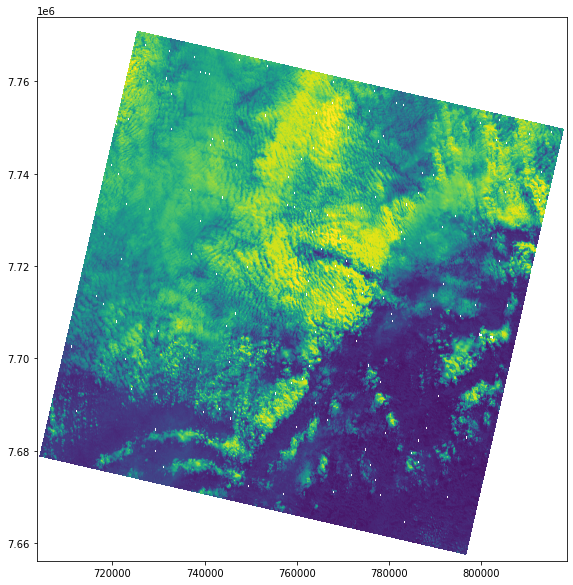

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

Converting the image to numpy arrays

In [10]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype('f4')
src_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

This next step removes null arrays by assigning them as np.nan and then plots the image again. For this particular image, this step is not necessary. It was kept here from original notebook only as a reminder of NaN edge removal 

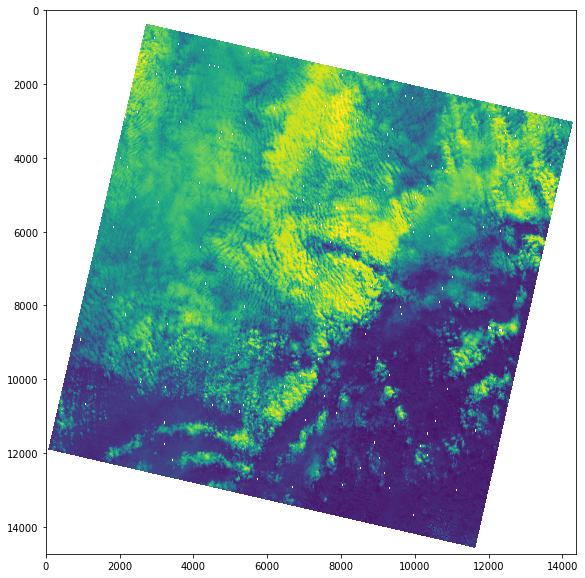

In [11]:
src_image_array[src_image_array==0] = np.nan
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image_array, ax=ax)
plt.show()

##Subseting an Image

To only access a particular part of the image, you can filter out with rows, columns, width and height of the picture. Let us say, we do not want the whole image but an image with 256 X 256 (width and height) cutting off at 2000 cols and 10000 rows.

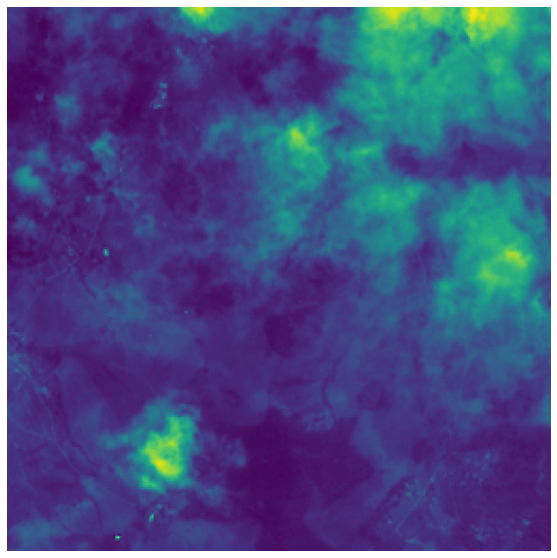

In [25]:
# Window(col_off, row_off, width, height)
window = rio.windows.Window(2000, 10000, 256, 256)
subset = src_image.read(1, window=window)
fig, ax = plt.subplots(1, figsize=(12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

##Create a false color composite

First assign each band as a single image. Since we want to use the data for vegetation analysis, we'll use bands 4 (Near Infrared), 3(Red) and 2(Green) of the WPS CBERS 04A instrument

In [17]:
nir = rio.open('/content/drive/MyDrive/CBERS04A/CBERS_4A_WPM_20200522_198_139_L4_BAND4.tif')
red = rio.open('/content/drive/MyDrive/CBERS04A/CBERS_4A_WPM_20200522_198_139_L4_BAND3.tif')
green = rio.open('/content/drive/MyDrive/CBERS04A/CBERS_4A_WPM_20200522_198_139_L4_BAND2.tif')

We create a composite image by opening an empty image and populating it with the three bands we opened above

In [21]:
# Create pseudo color NIR-R-G (2,3,4) image
with rio.open('nrg.tiff','w',driver='Gtiff', width=red.width, height=red.height,count=3,crs=red.crs,transform=red.transform, dtype=red.dtypes[0]) as nrg:
  nrg.write(green.read(1),1)
  nrg.write(red.read(1),2)
  nrg.write(nir.read(1),3)
  nrg.close()

In [22]:
img = rio.open('/content/nrg.tiff')

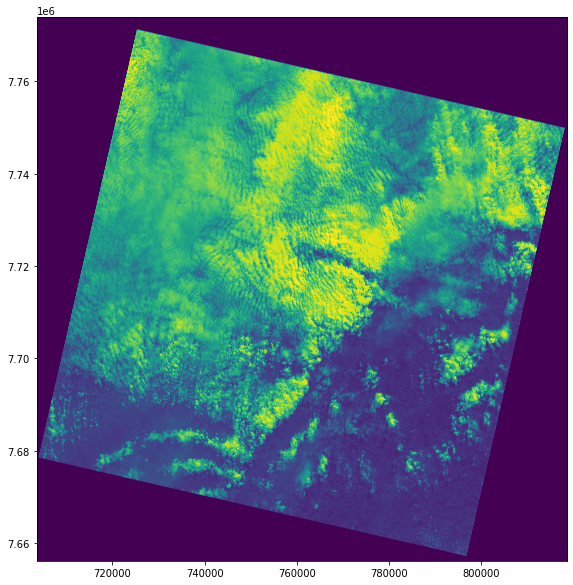

In [24]:
fig, ax = plt.subplots(1, figsize=(10, 10))
show(img, ax=ax)
plt.show()

Now the composite can be downloaded on the files section

#END